# Implement image style transfer, transforming a given content image to adopt the artistic style of another image, using a pre-trained model.

## Imports

In [21]:
import tensorflow_hub as tf_hub
import tensorflow as tf

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
!curl https://i.imgur.com/9ooB60I.jpeg -o style.jpeg
!curl https://i.imgur.com/F28w3Ac.jpg -o content.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  913k  100  913k    0     0  3962k      0 --:--:-- --:--:-- --:--:-- 3973k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  100k  100  100k    0     0   537k      0 --:--:-- --:--:-- --:--:--  537k


## Function to load image

In [6]:
def load_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [19]:
content_img = load_img('content.jpg')
style_img = load_img('style.jpeg')

(-0.5, 1159.5, 933.5, -0.5)

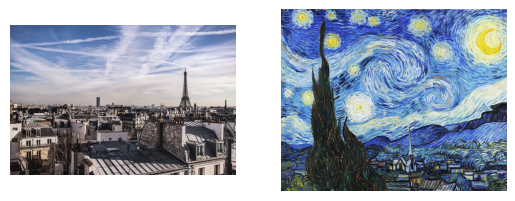

In [22]:
plt.subplot(121)
plt.imshow(content_img)
plt.axis('off')
plt.subplot(122)
plt.imshow(style_img)
plt.axis('off')

## Load model

In [23]:
model = tf_hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Function to transfer style of an image

In [48]:
def style_transfer(content_img, style_img):
    # Add batch dim to image
    # IDK why use tf.constant, if u don't use u will get error
    content_img = tf.constant(np.expand_dims(content_img, axis=0).astype('float32'))
    style_img = tf.constant(np.expand_dims(style_img, axis=0).astype('float32'))
    output = model(content_img, style_img) # returns list of output []
    return output[0][0] # again indexed to remove batch_dim :)

In [50]:
result = style_transfer(content_img, style_img)

## Display the Results

In [51]:
def plot_img(img, title=None, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')

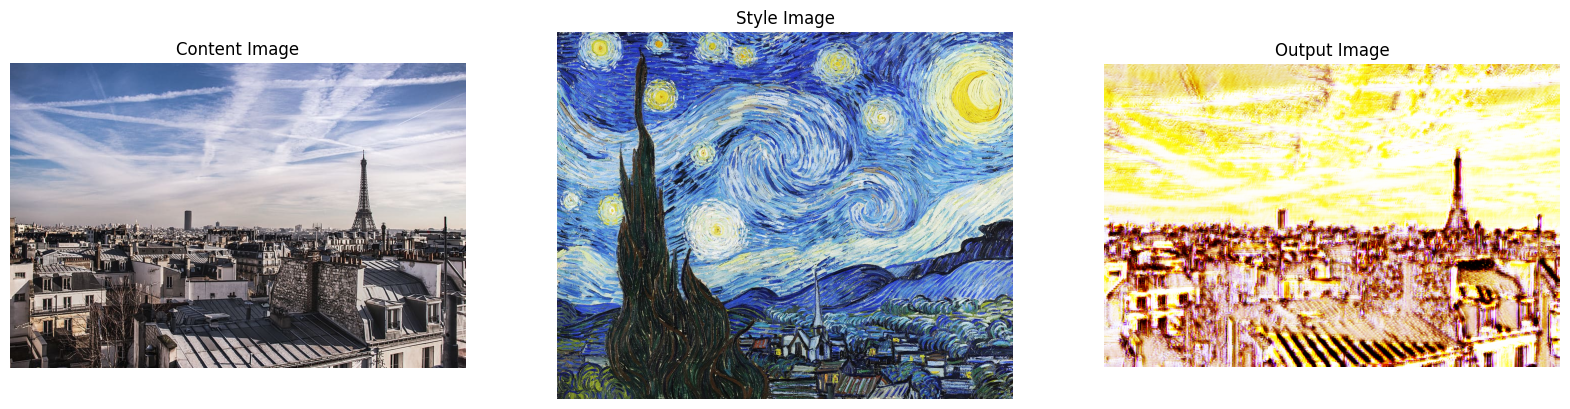

In [52]:
plt.figure(figsize=(20,18))
plt.subplot(131)
plot_img(content_img, title="Content Image")
plt.subplot(132)
plot_img(style_img, title="Style Image")
plt.subplot(133)
plot_img(result, title="Output Image")

# Experiments (Not for use)

In [ ]:
np.array([1, 2, 3]).astype('float')

array([1., 2., 3.])

In [ ]:
y = model(tf.constant(np.expand_dims(content_img, axis=0).astype('float32')), tf.constant(np.expand_dims(style_img, axis=0).astype('float32')))

In [ ]:
y[0].shape

TensorShape([1, 608, 912, 3])

In [ ]:
style_img.shape, content_img.shape

((934, 1160, 3), (607, 910, 3))

In [ ]:
y1 = model(tf.constant(np.expand_dims(content_img, axis=0).astype('float32')), tf.constant(np.expand_dims(cv2.resize(style_img, (256, 256)), axis=0).astype('float32')))
y1[0].shape

TensorShape([1, 608, 912, 3])